### Import libraries

In [28]:
import datetime
import itertools
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

### Load data files

In [29]:
# load the target dataset.
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()   
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [30]:
# Reshape to the form satiable to KNN model structure.
train_X = train_X.reshape(-1,3072)
train_Y = train_Y.reshape(-1,)
test_X = test_X.reshape(-1,3072)
test_Y = test_Y.reshape(-1,)

In [31]:
print('train_X shape:', train_X.shape)
print('train_Y shape:', train_Y.shape)
print('test_X shape:', test_X.shape)
print('test_Y shape:', test_Y.shape)
print('label_names:', label_names)

train_X shape: (50000, 3072)
train_Y shape: (50000,)
test_X shape: (10000, 3072)
test_Y shape: (10000,)
label_names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


### PCA

In [32]:
# Apply PCA for feature extraction.
t0 = datetime.datetime.now()

pca = PCA(n_components=40)
pca.fit(train_X, train_Y)

train_X_pca = pca.transform(train_X)
test_X_pca = pca.transform(test_X)

to = datetime.datetime.now() - t0
print('PCA runtime:', to)

PCA runtime: 0:00:09.462674


In [33]:
print('train_X_pca shape:', train_X_pca.shape)
print('test_X_pca shape:', test_X_pca.shape)

train_X_pca shape: (50000, 40)
test_X_pca shape: (10000, 40)


### KNN

In [34]:
### Construct KNN model employment.
clf = KNeighborsClassifier(n_neighbors=5,
                           weights='distance',     #{distance, uniform}
                           algorithm = 'auto'
                           )     

### CV

In [35]:
# execute the 10-fold cross validation exercise in training dataset.
t0 = datetime.datetime.now()

CV_accuracy_score = cross_val_score(clf, train_X_pca, train_Y, cv=2, scoring = 'accuracy')
CV_precision_score = cross_val_score(clf, train_X_pca, train_Y, cv=2, scoring = 'precision_macro')
CV_recall_score = cross_val_score(clf, train_X_pca, train_Y, cv=2, scoring = 'recall_macro')
CV_f1_score = cross_val_score(clf, train_X_pca, train_Y, cv=2, scoring = 'f1_macro')
average_accuracy = np.mean(CV_accuracy_score)
average_precision = np.mean(CV_precision_score)
average_recall = np.mean(CV_recall_score)
average_f1 = np.mean(CV_f1_score)

to = datetime.datetime.now() - t0
print('KNN runtime:', to)

KNN runtime: 0:01:27.278574


In [36]:
print('average_accuracy:', average_accuracy)
print('average_precision:', average_precision)
print('average_recall:', average_recall)
print('average_f1:', average_f1)

average_accuracy: 0.38552
average_precision: 0.41163286837448265
average_recall: 0.38552
average_f1: 0.3814692900058774


### Predict test set

In [37]:
# output the test data prediction result.
t0 = datetime.datetime.now() 

clf = clf.fit(train_X_pca, train_Y)
pred_Y = clf.predict(test_X_pca)

to = datetime.datetime.now() - t0
print('test runtime:', to)

test runtime: 0:00:09.925106


### Performance

In [38]:
accuracy_score(test_Y, pred_Y) # Точность

0.4175

In [39]:
def plot_confusion_matrix(cm, classes, normalize, title):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    title_font = {'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 15}
    label_font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 10}
    plt.title(title, fontdict=title_font)
    plt.ylabel('True label',fontdict=label_font)
    plt.xlabel('Predicted label',fontdict=label_font)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()

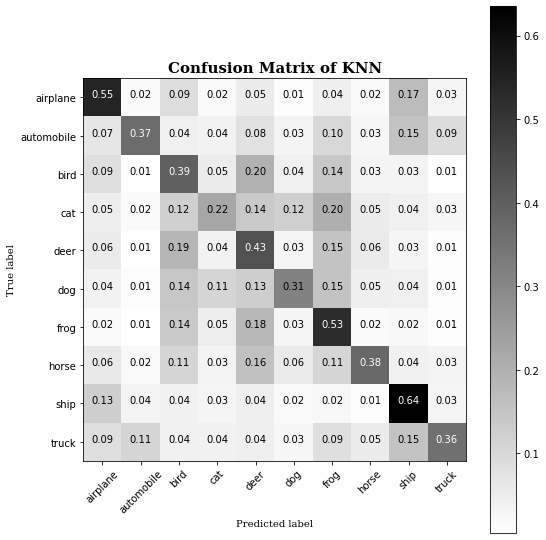

In [40]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_Y, pred_Y)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=label_names, normalize=True, 
                      title='Confusion Matrix of KNN')

In [41]:
print(classification_report(test_Y, pred_Y, target_names=label_names))

              precision    recall  f1-score   support

    airplane       0.48      0.55      0.51      1000
  automobile       0.61      0.37      0.46      1000
        bird       0.30      0.39      0.34      1000
         cat       0.35      0.22      0.27      1000
        deer       0.30      0.43      0.35      1000
         dog       0.45      0.31      0.37      1000
        frog       0.34      0.53      0.41      1000
       horse       0.54      0.38      0.45      1000
        ship       0.48      0.64      0.55      1000
       truck       0.59      0.36      0.45      1000

    accuracy                           0.42     10000
   macro avg       0.44      0.42      0.42     10000
weighted avg       0.44      0.42      0.42     10000

